In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Games.csv')
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.7+ KB


In [5]:
#Publisher With Highest Games
publish = df['Publisher'].value_counts(ascending=False)
publish = publish[0:5]
publish

Electronic Arts           19
Blizzard Entertainment     8
Paradox Interactive        7
Activision                 6
GT Interactive             5
Name: Publisher, dtype: int64

D:\Users\Achal-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


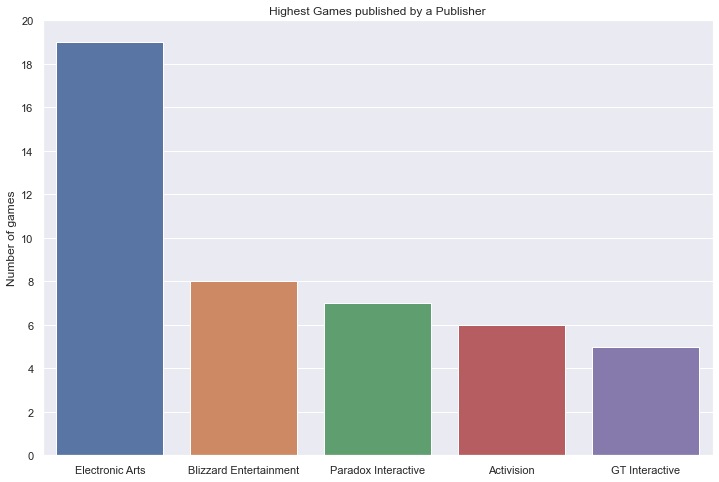

In [17]:
#Plotting top publisher on chart\
sns.barplot(publish.index, publish.values)
sns.set(rc = {'figure.figsize':(10,8)})
sns.set(rc = {'figure.figsize':(12,8)})
plt.title('Highest Games published by a Publisher')
plt.ylabel('Number of games')
plt.yticks(ticks=[0,2,4,6,8,10,12,14,16,18,20])
plt.show()

In [7]:
#Most Popular Genre
df_Genre = df.groupby('Genre', as_index=False)['Sales'].sum()
df_Genre = df_Genre.sort_values(by='Sales',ascending=False)
df_Genre


,Genre,Sales
1,Action role-playing,58.1
39,Real-time strategy,55.0
12,Battle royale,52.0
22,First-person shooter,46.0
45,"Sandbox, survival",33.0
...,...,...
40,"Real-time strategy, grand strategy wargame",1.0
33,Platform,1.0
38,Rail shooter,1.0
34,Point-and-click,1.0


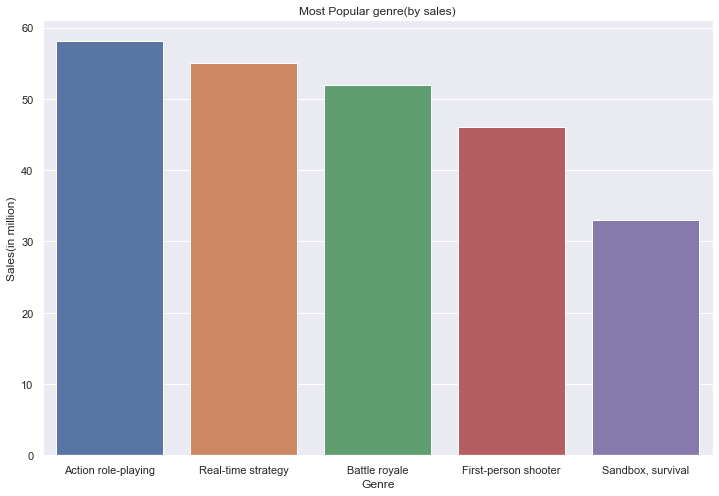

In [16]:
sns.barplot(x='Genre', y='Sales', data = df_Genre, order=plot_limit[0:5])
plt.ylabel('Sales(in million)')
plt.title('Most Popular genre(by sales)')
plt.show()

In [19]:
#Developer with highest games
dev = df['Developer'].value_counts(ascending=False)
dev= dev[0:5]
dev

Blizzard Entertainment        8
Maxis                         6
Paradox Development Studio    5
Capcom                        4
CD Projekt Red                4
Name: Developer, dtype: int64

D:\Users\Achal-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


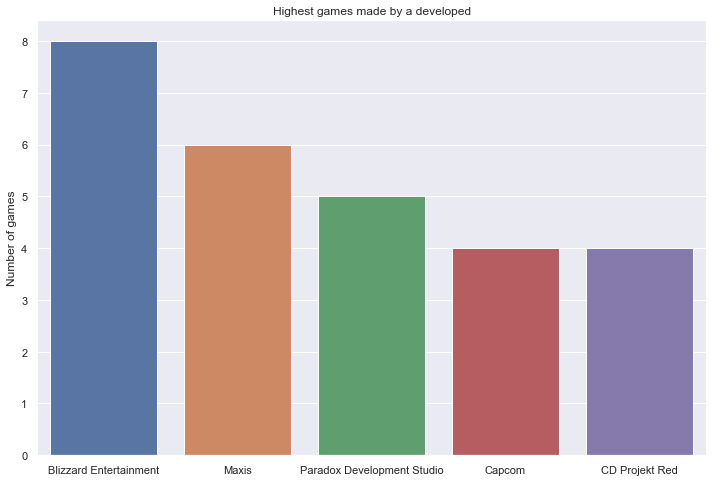

In [23]:
#Plotting top developers
sns.barplot(dev.index, dev.values)
plt.title('Highest games made by a developed')
plt.ylabel('Number of games')
plt.show()

In [27]:
#Most popular series of game
pop_series = df.groupby('Series')['Sales'].sum()
pop_series = pop_series.sort_values(ascending=False)[0:5]
pop_series

Series
Minecraft    33.0
Diablo       26.0
The Sims     24.0
Half-Life    21.0
Warcraft     19.0
Name: Sales, dtype: float64

D:\Users\Achal-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


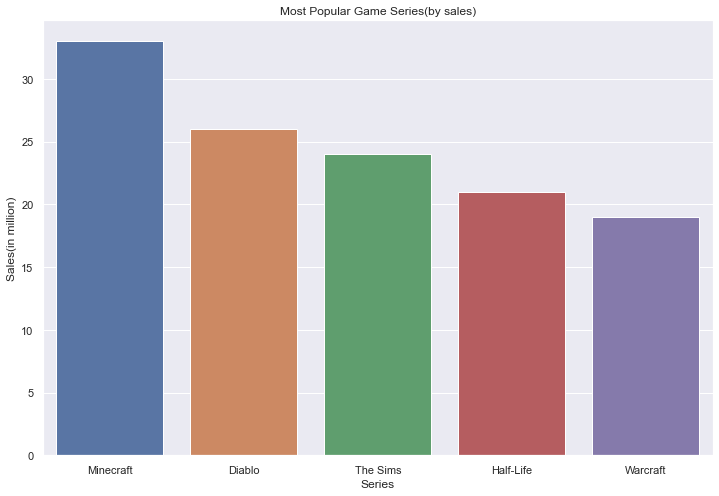

In [29]:
#Plotting Most Popular series of Game
sns.barplot(pop_series.index, pop_series.values)
plt.title('Most Popular Game Series(by sales)')
plt.ylabel('Sales(in million)')
plt.show()


In [30]:
#Top selling game
df_top_games = df.sort_values(by = 'Sales', ascending=False)
df_top_games.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic


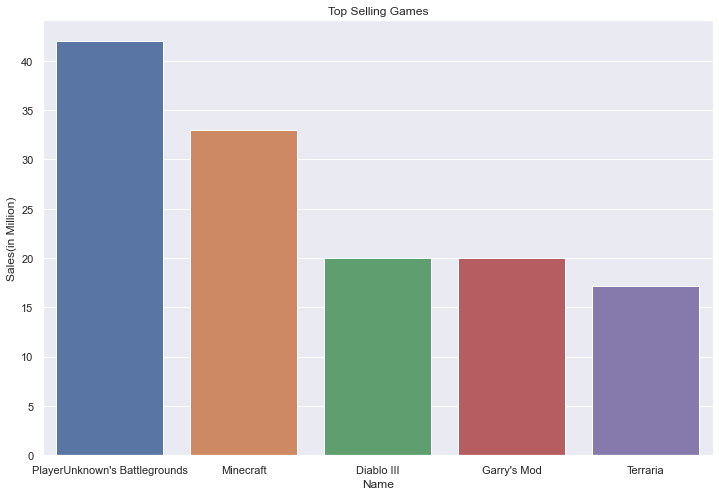

In [32]:
#plotting Top selling Games
sns.barplot(x = 'Name', y = 'Sales', data = df_top_games[0:5])
plt.title('Top Selling Games')
plt.ylabel('Sales(in Million)')
plt.show()

In [34]:
#Top Publisher
df_top_publisher = df.groupby('Publisher', as_index=False)['Sales'].sum()
df_top_publisher = df_top_publisher.sort_values(by = 'Sales', ascending=False)
df_top_publisher


,Publisher,Sales
8,Blizzard Entertainment,59.0
28,Electronic Arts,54.0
51,Krafton,42.0
59,Mojang Studios,33.0
89,Valve,20.0
...,...,...
41,Hasbro Interactive,1.0
47,Introversion Software,1.0
53,Larian Studios,1.0
71,Softstar,1.0


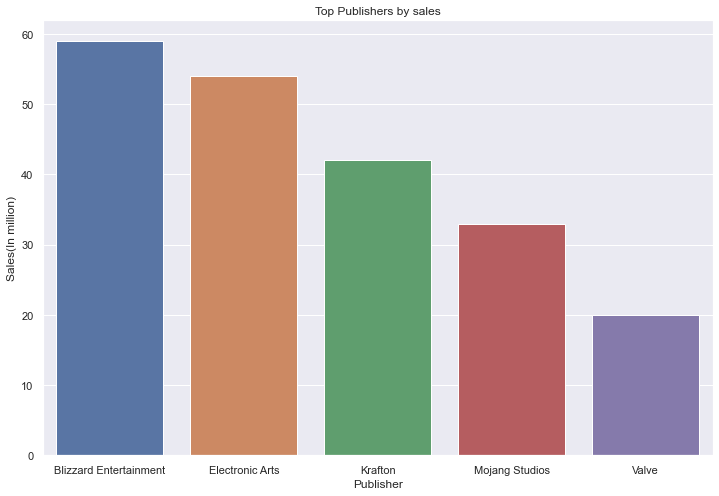

In [36]:
#Plotting top publisher
sns.barplot(x='Publisher', y='Sales', data = df_top_publisher[0:5])
plt.title('Top Publishers by sales')
plt.ylabel('Sales(In million)')
plt.show()

In [37]:
#Top Developer
df_top_dev = df.groupby('Developer', as_index=False)['Sales'].sum()
df_top_dev = df_top_dev.sort_values(by = 'Sales', ascending=False)
df_top_dev


,Developer,Sales
6,Blizzard Entertainment,58.0
69,PUBG Studios,42.0
65,Mojang Studios,33.0
60,Maxis,33.0
34,Facepunch Studios,29.0
...,...,...
80,SCE Cambridge Studio,1.0
40,Galactic Cafe,1.0
31,Enlight Software,1.0
84,Softstar,1.0


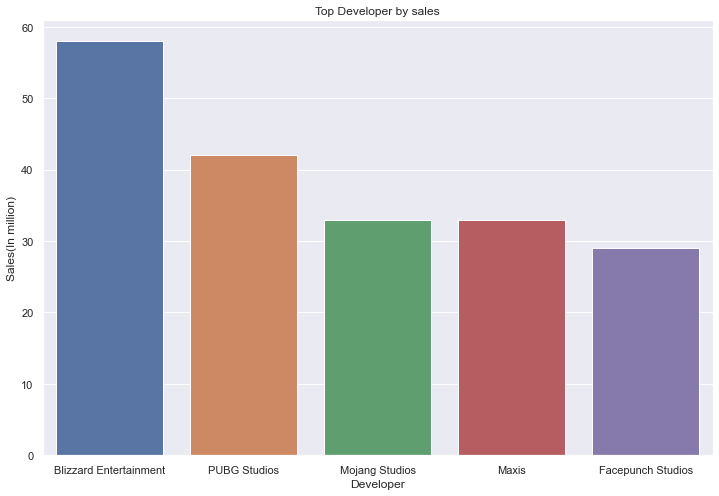

In [39]:
#Plotting top Developer
sns.barplot(x='Developer', y='Sales', data = df_top_dev[0:5])
plt.title('Top Developer by sales')
plt.ylabel('Sales(In million)')
plt.show()